<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/header_small.png">

*Esta libreta contiene material del Taller de Python que se lleva a cabo como parte del 
evento [Data Challenge Industrial 4.0](www.lania.mx/dci). El contenido ha sido adaptado 
por HTM y GED a partir del libro [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) 
de Jake VanderPlas y se mantiene la licencia sobre el texto, 
[CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), 
y sobre el codigo [MIT license](https://opensource.org/licenses/MIT).*

<!--NAVIGATION-->
< [¿Qué es Machine Learning?](03.01-What-Is-Machine-Learning.ipynb) | [Contenido](Index.ipynb) | [Hiperparámetros y validación de modelos](03.03-Hyperparameters-and-Model-Validation.ipynb) >

<a href="https://colab.research.google.com/github/htapia/TallerPythonIntroCienciaDatos/blob/master/notebooks/03.02-Introducing-Scikit-Learn.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Introduciendo Scikit-Learn

## Representación de datos en Scikit-Learn

### Datos como tablas


In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Matriz de atributos

#### Vector de objetivos

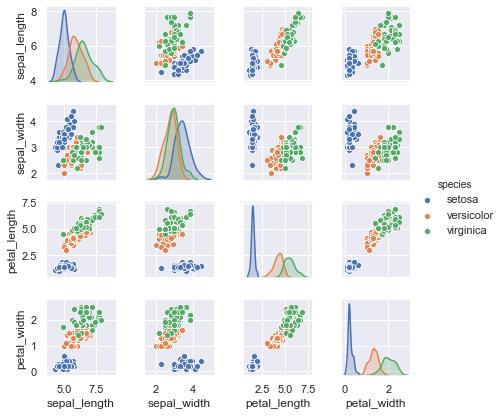

In [2]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height=1.5);

In [3]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [4]:
y_iris = iris['species']
y_iris.shape

(150,)

![](figures/05.02-samples-features.png)
[figure source in Appendix](06.00-Figure-Code.ipynb#Features-and-Labels-Grid)

## API de Estimadores de Scikit-Learn

### Básicos de la API

Most commonly, the steps in using the Scikit-Learn estimator API are as follows
(we will step through a handful of detailed examples in the sections that follow).

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the ``fit()`` method of the model instance.
5. Apply the Model to new data:
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.

We will now step through several simple examples of applying supervised and unsupervised learning methods.


Más comunmente, los pasos para usar la API del estimador de Scikit-Learn son los siguientes(veremos algunos ejemplos de de manera detallada a continuación)


1. Elija una clase del modelo para importado de la clase estimador apropiada de Scikit-Learn.
2. Elija modelo de hiperparámetros del modelo creado por instancias de esta clase con los valores deseados.
3. Organice los datos en una matriz característica y un vector objetivo siguiendo la discusión anterior.
4. Ajuste el modelo a sus datos usando el método llamado "fit()" de la instancia del modelo.
5. Aplique el modelo a nuevos datos:

	-Para el aprendizaje supervizado, a menudo predecimos etiquetas para datos desconocidos usando el método ``predict()``.

	-Para el aprendizaje no supervisado, usualmene transformamos o inferimos las propiedades de los datos usando los métodos ``transform()`` ó ``predict()``.

Ahora veremos algunos ejemplos simples de la aplicación de métodos de aprendizaje supervisados y no supervisados.

### Ejemplo de aprendizaje supervisado: regresión lineal simple

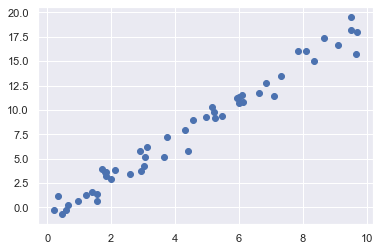

In [5]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

#### 1. Elegir una clase de model


In [6]:
from sklearn.linear_model import LinearRegression

#### 2. Elegir los hiperparametros del model 

In [7]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 3. Acomodar los datos en una matriz de atributos y un vector de objetivos

In [8]:
X = x[:, np.newaxis]
X.shape

(50, 1)

#### 4. Ajustar el modelo a los datos

In [9]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
model.coef_

array([1.9776566])

In [11]:
model.intercept_

-0.9033107255311092

#### 5. Predicción usando el modelo con datos nuevos

In [12]:
xfit = np.linspace(-1, 11)

In [13]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

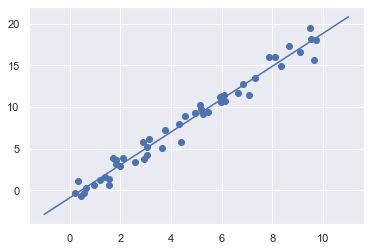

In [14]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

### Ejemplo de aprendizaje supervisado: clasificación del conjunto de Iris

In [15]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [ ]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

### Ejemplo de aprendizaje no supervisado: dimensionalidad del conjunto de Iris

In [ ]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

In [ ]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

### Aprendizaje no superviado: acumulación del conjunto de Iris 

In [ ]:
from sklearn.mixture import GMM      # 1. Choose the model class
model = GMM(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster labels

In [ ]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

## Aplicación: Digitos escritos a mano

### Cargando y visualizando los datos

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [ ]:
X = digits.data
X.shape

In [ ]:
y = digits.target
y.shape

### Aprendizaje no supervisado: Reducción de dimensionalidad

In [ ]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

In [ ]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

### Clasificación de digitos

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

In [ ]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

## Resúmen

En esta sección hemos visto algunas de las característics esenciales de la librería Scikit-Learn y la API de estimadores. Con ésta información pueden comenzar a probar distintos de los modelos disponibles en la librería en sus datos. En las siguientes secciones veremos como elegir y validar el modelo.

<!--NAVIGATION-->
< [¿Qué es Machine Learning?](03.01-What-Is-Machine-Learning.ipynb) | [Contenido](Index.ipynb) | [Hiperparámetros y validación de modelos](03.03-Hyperparameters-and-Model-Validation.ipynb) >

<a href="https://colab.research.google.com/github/htapia/TallerPythonIntroCienciaDatos/blob/master/notebooks/03.02-Introducing-Scikit-Learn.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
